In [1]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime
import plotly.express as px
import math
import warnings
warnings.filterwarnings('ignore')
import time
from time import perf_counter
import glob
import tweets_utils
import csv
import importlib
import seaborn as sns
%autosave 3600

Autosaving every 3600 seconds


In [2]:
path = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/csv/not_found/")
issues = pd.read_csv(path[0] + "users_not_found.csv", low_memory=False, lineterminator="\n")
suspended = pd.read_csv(path[0] + "users_not_found_inspected.csv", low_memory=False, lineterminator="\n")

In [11]:
issues.loc[(issues["code"].notna())]

,id,screen_name,not_found,code,message
649,6044332,CookKCEgyptian,True,63.0,User has been suspended.
791,7154912,Jeapam,True,50.0,User not found.
792,7154912,xiscan1,True,50.0,User not found.
830,7404072,Robert33829889,True,50.0,User not found.
1483,12004852,marshalotis,True,63.0,User has been suspended.
...,...,...,...,...,...
99215,1257676687359254528,TravelWithMOW,True,50.0,User not found.
99240,1258056656728076288,SoloPocono2,True,50.0,User not found.
99288,1258831196479504384,teresawonline,True,63.0,User has been suspended.
99299,1259069865903763456,Mista_Craw4ed,True,50.0,User not found.


In [12]:
ids_suspended = list(suspended.loc[(suspended['code']==63)]["id"])

In [17]:
list_name = issues[issues.id.isin(ids_suspended)]["screen_name"]

# Study behaviour

In [7]:
files_tweets = glob.glob("F:/Supsi/COVID-19-Tweets/*/tweets.csv")

In [10]:
chunksize = 10
for chunk in pd.read_csv(files_tweets[0], chunksize=10, lineterminator = '\n'):
    df = chunk
    break
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10 non-null     int64  
 1   id_str                     10 non-null     int64  
 2   created_at                 10 non-null     object 
 3   user_id                    10 non-null     int64  
 4   user_screen_name           10 non-null     object 
 5   user_verified              10 non-null     bool   
 6   user_created_at            10 non-null     object 
 7   text                       10 non-null     object 
 8   source                     10 non-null     object 
 9   coordinates                0 non-null      float64
 10  is_quote_status            10 non-null     bool   
 11  retweet_count              10 non-null     int64  
 12  favorite_count             10 non-null     int64  
 13  favorited                  10 non-null     bool   
 1

In [39]:
cols_tweets = [u'user_screen_name', u'rt_user_screen_name', u'hashtags', u'urls', u'text', u'created_at']

users = []
hashtags = []
urls = []
text = []
created_at = []

In [40]:
result = []
importlib.reload(tweets_utils)
start_time = time.perf_counter()
j = 0
for filename in files_tweets:
    print(f"Reading file: {filename}")
    result.extend(tweets_utils.process_all_data(filename, cols_tweets, True, list_name))
    lista = result[j]
    j = j + 1
    print(f"Mese numero {j}")
    for i in range(len(lista)):
        users.extend(lista[i]["users"])
        hashtags.extend(lista[i]["hashtags"])
        urls.extend(lista[i]["urls"])
        text.extend(lista[i]["text"])
        created_at.extend(lista[i]["created_at"])
        
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Reading file: F:/Supsi/COVID-19-Tweets\2020-01\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Mese numero 1
Reading file: F:/Supsi/COVID-19-Tweets\2020-02\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
Processing chunk 10
Processing chunk 11
Processing chunk 12
Mese numero 2
Reading file: F:/Supsi/COVID-19-Tweets\2020-03\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
Processing chunk 10
Processing chunk 11
Processing chunk 12
Processing chunk 13
Processing chunk 14
Processing chunk 15
Mese numero 3
Reading file: F:/Supsi/COVID-19-Tweets\2020-04\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chu

In [42]:
len(users)

97562

In [43]:
df = pd.DataFrame(list(zip(users, hashtags, urls, text, created_at)),
               columns =['name', 'hashtags', 'urls', 'text', "date"])
df.to_csv("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/large_files/df_suspended.csv", 
          encoding='utf-8', index=False, line_terminator='\n')

# Hashtags

In [96]:
hs = tweets_utils.hashtag_process(df)
list_covid_keyword = ["coronavirus", "covid19", "covid", "chinacoronavirus", "coronavirusoutbreak",
  "covid_19", "sarscov2", "covidー19", "wuhancoronavirus", "wuhan", "china", "coronoavirus", "coronaviruschina"]
list_1 = [item for item in hs if item.lower() not in list_covid_keyword]
# list_1

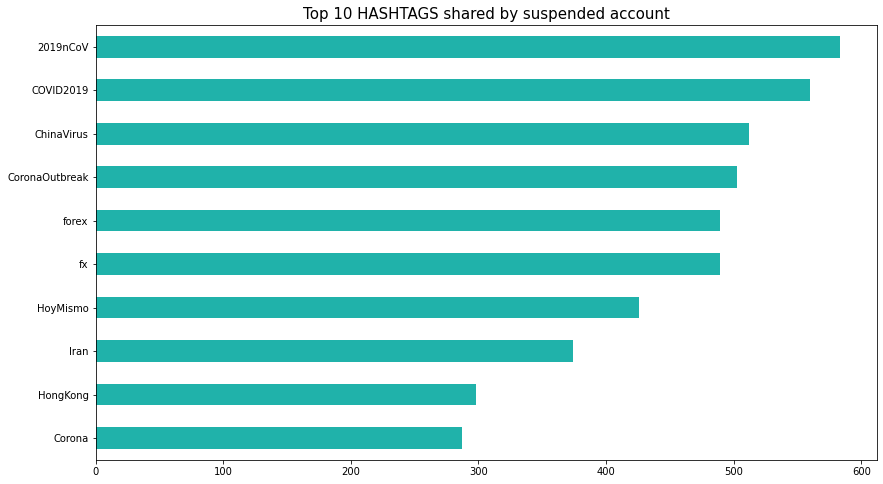

In [100]:
hs = pd.Series(list_1).value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = hs[:10].plot(kind='barh', color='lightseagreen', fig=(14,14)) #green #steelblue
ax.set_title('Top 10 HASHTAGS shared by suspended account', fontsize=15)
ax.invert_yaxis()
plt.show()

# Urls

In [99]:
urls = df["urls"]
urls = [tweets_utils.url_decompress(v) if v != "[]" else "0" for v in urls]
urls = list(filter(lambda num: num != "0", urls))
urls = tweets_utils.remove_www(urls)
urls = pd.Series(urls).value_counts().sort_values(ascending=False)
urls

twitter.com                  8897
bit.ly                       2164
thepigeonexpress.com         1714
mazo4f.com                    894
ow.ly                         572
                             ... 
brighterworld.mcmaster.ca       1
counton2.com                    1
royalcentral.co.uk              1
chroniclelive.co                1
explica.co                      1
Length: 2731, dtype: int64

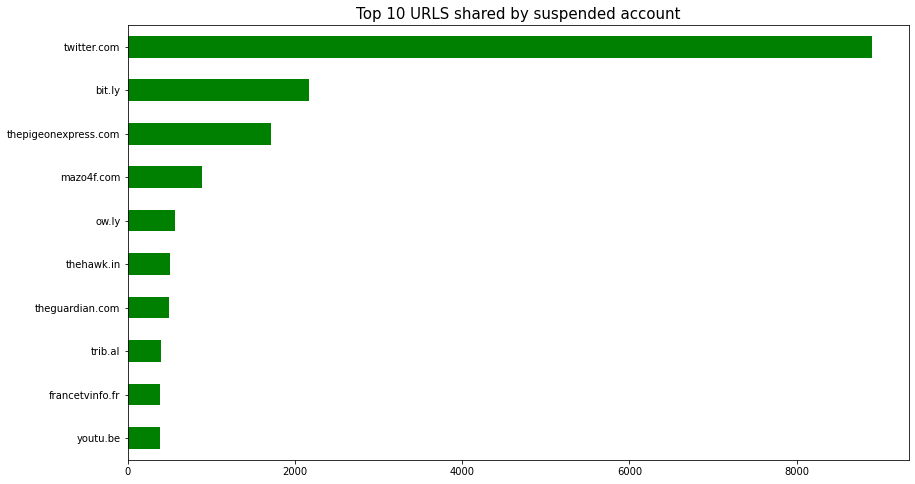

In [102]:
fig = plt.figure(figsize=(14, 8))
ax = urls[:10].plot(kind='barh', color='green', fig=(14,14)) #green #steelblue
ax.set_title('Top 10 URLS shared by suspended account', fontsize=15)
ax.invert_yaxis()
plt.show()

# Date

In [105]:
dates = []
for i in created_at:
    x = tweets_utils.process_datetime(i)
    dates.append(x)

'2020-05-12'

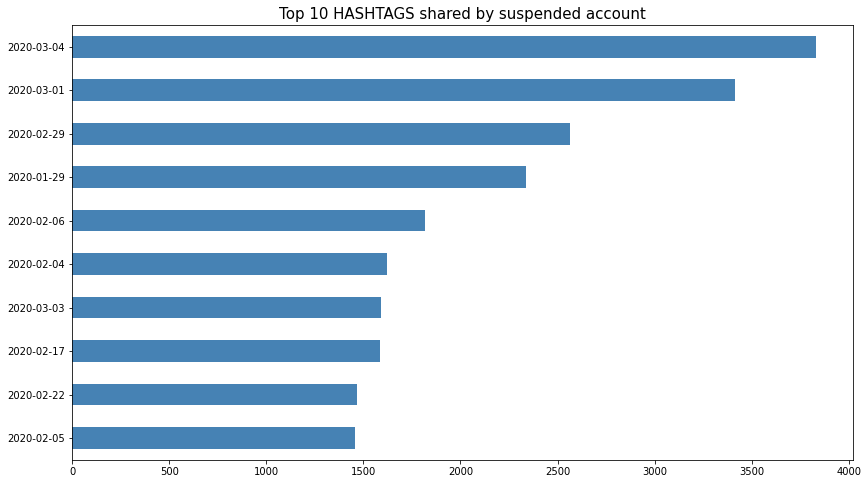

In [107]:
dates_p = pd.Series(dates).value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = dates_p[:10].plot(kind='barh', color='steelblue', fig=(14,14)) #green #steelblue
ax.set_title('Top 10 HASHTAGS shared by suspended account', fontsize=15)
ax.invert_yaxis()
plt.show()

In [110]:
# fig = px.histogram(dates)
# fig.update_layout(
#     title_text='Daily tweets', # title of plot
#     xaxis_title_text='Tweet', # xaxis label
#     yaxis_title_text='Count', # yaxis label
#     bargap=0.1, # gap between bars of adjacent location coordinates
#     bargroupgap=0.1 # gap between bars of the same location coordinates
# )
# fig.show()